In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/churn_train.csv')
df.shape

(40000, 12)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [3]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### Process:
v1,
- visualize/explore the data, impute null values for key features w simple method (mean or mode)
- separate into X and y for modeling
- do a logistic regression, interpret coefficients
- decision tree? for intuitions about splits/what matters

v2,
- segment by city
- knn to impute data
- random forest

#### Feature analysis -
Features to keep:
- avg_rating_by_driver: missing some values. mean is very high (4.77), with low standard dev. we may need to normalize features somehow to get signal
- avg_rating_of_driver: missing more values. mean is 4.6, slightly higher standard dev.
- trips_in_first_30_days
- phone
- weekday_pct

Features to remove:
- avg_dist: mean of 5.7, spread from 0 to 160; likely collinear with trips in first 30 days
- avg_surge looks almost meaningless (25th percentil eis 1, 75th is 1.05), and not necessarily actionable except for maybe a few outliers. let's throw it out.
- surge_pct also meaningless for the same reasons
- luxury_car_user


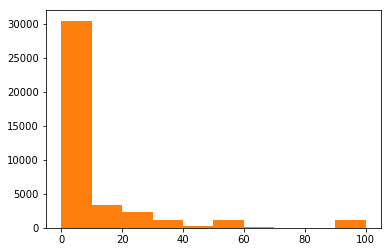

In [5]:
plt.hist(df['surge_pct'])
plt.show()

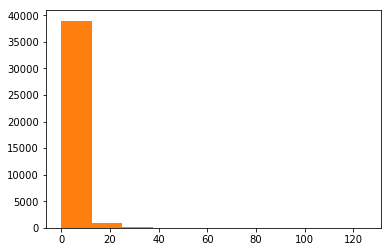

In [26]:
plt.hist(df['trips_in_first_30_days'])
plt.show()

In [27]:
df['avg_rating_by_driver'].unique()

array([ 5. ,  4. ,  4.7,  4.8,  4.3,  4.6,  4.9,  4.4,  3. ,  4.5,  3.8,
        4.2,  1. ,  3.7,  2. ,  nan,  3.4,  3.5,  2.5,  4.1,  3.3,  3.9,
        3.6,  3.2,  2.3,  2.8,  2.7,  1.5])

In [29]:
df['luxury_car_user'].mean()

0.37614999999999998

In [30]:
df['weekday_pct'].describe()

count    40000.000000
mean        60.874382
std         37.089619
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

In [40]:
df['avg_rating_by_driver']
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'],inplace=True)

In [49]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].apply(lambda x: df['avg_rating_by_driver'].mean() if x == 'nan' or np.isnan(x) else x)
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].apply(lambda x: df['avg_rating_of_driver'].mean() if x == 'nan' or np.isnan(x) else x)

In [51]:
df['avg_rating_of_driver'].unique()

array([ 5.        ,  4.60169694,  4.        ,  4.7       ,  3.        ,
        3.7       ,  4.5       ,  3.3       ,  3.6       ,  4.3       ,
        4.6       ,  3.8       ,  4.1       ,  1.        ,  4.4       ,
        4.9       ,  3.5       ,  4.8       ,  2.        ,  3.1       ,
        3.4       ,  4.2       ,  2.8       ,  2.7       ,  2.5       ,
        3.9       ,  2.6       ,  1.9       ,  2.3       ,  3.2       ,
        2.9       ,  2.1       ,  1.7       ,  1.5       ,  2.4       ,
        2.2       ,  1.8       ,  1.6       ])